In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
# define the plotting functions

def get_hist(model, data_set):
    activations = model.activation(data_set.x)
    for i, activation in enumerate(activations):
        plt.hist(activation.numpy(), 4, density = True)
        plt.title('Activation layer' + str(i+1))
        plt.xlabel('Activation')
        plt.legend()
        plt.show()

In [3]:
def PlotStuff(X, Y, model=None, leg=False):
    plt.plot(X[Y==0].numpy(), Y[Y==0].numpy(), 'or', label='training points y=0' )
    plt.plot(X[Y==1].numpy(), Y[Y==1].numpy(), 'ob', label='training points y=1' )
    if model!=None:
        plt.plot(X.numpy(), model(X).detach().numpy(), label='neural network')
        
    plt.legend()
    plt.show()

In [4]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.linspace(-20,20,100).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        
        self.y[(self.x[:,0] > -10) & (self.x[:,0] < -5)] = 1
        self.y[(self.x[:,0] > 5) & (self.x[:,0] < 10)] = 1
        self.y = self.y.view(-1,1)
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [5]:
class Net(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [6]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=5, plot_number=10):
    
    cost = []
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
        
        if epoch % plot_number == 0:
            PlotStuff(data_set.x, data_set.y, model)
            
        cost.append(total)
        
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [7]:
data_set = Data()

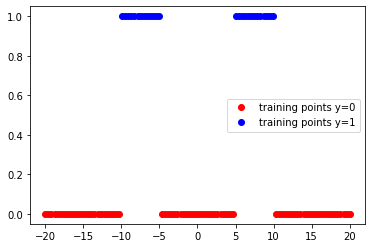

In [8]:
PlotStuff(data_set.x, data_set.y, leg=False)

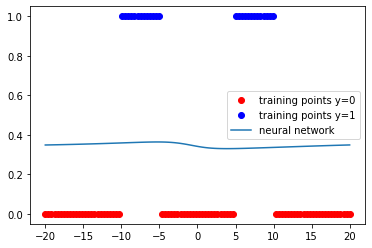

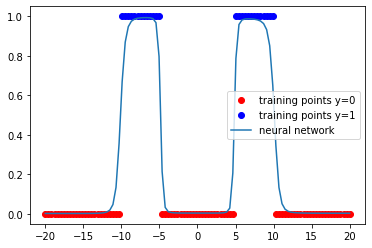

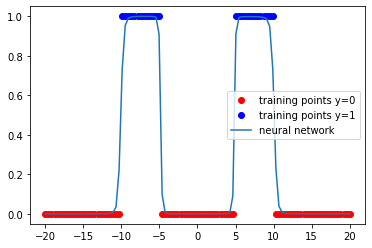

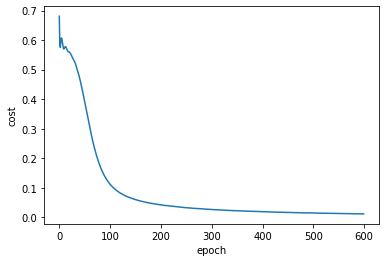

In [9]:
torch.manual_seed(0)
model = Net(1,9,1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=100)
COST = train(data_set, model, criterion, train_loader, optimizer, epochs=600, plot_number=200)